In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import yfinance as yf

In [3]:
stock_list=['AAPL','ASML','COST','ISRG','LMT','JPM','QCOM','JNJ']
end=datetime.now()
start=datetime(end.year-10, end.month, end.day)

In [4]:
df_stock=pd.DataFrame()
for stock in stock_list:
    stockData=yf.download(stock, start, end)
    stockData['Ticker']=stock
    df_stock=pd.concat([df_stock, stockData])
df_stock.head()  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2013-01-24 00:00:00-05:00,16.428572,16.633215,16.080357,16.089287,13.836589,1460852400,AAPL
2013-01-25 00:00:00-05:00,16.131786,16.293928,15.535714,15.710000,13.510409,1208026400,AAPL
2013-01-28 00:00:00-05:00,15.636786,16.186071,15.566429,16.065357,13.816009,785517600,AAPL
2013-01-29 00:00:00-05:00,16.375000,16.435715,16.147142,16.366785,14.075233,571158000,AAPL
2013-01-30 00:00:00-05:00,16.321428,16.521429,16.232143,16.315357,14.031008,417155200,AAPL


In [5]:
df_stock['Daily Return']=df_stock['Adj Close'].pct_change()

In [6]:
df_stock.dropna(inplace=True)

In [7]:
df_return=df_stock[['Daily Return','Ticker']].pivot_table(
    'Daily Return', index=df_stock.index, columns='Ticker')

In [8]:
#std using n-1
df_return.std()

Ticker
AAPL    0.018124
ASML    0.024164
COST    0.021873
ISRG    0.026758
JNJ     0.015982
JPM     0.024972
LMT     0.020152
QCOM    0.025365
dtype: float64

In [9]:
#when calc mean, using n-1
deviation=df_return-df_return.mean()
squared_deviation=deviation**2
variance=squared_deviation.mean()
volatility=np.sqrt(variance)
volatility

Ticker
AAPL    0.018121
ASML    0.024160
COST    0.021868
ISRG    0.026753
JNJ     0.015979
JPM     0.024967
LMT     0.020148
QCOM    0.025360
dtype: float64

In [10]:
deviation=df_return-df_return.mean()
squared_deviation=deviation**2
variance=squared_deviation.sum()/(df_return.shape[0]-1)
volatility=np.sqrt(variance)
volatility

Ticker
AAPL    0.018117
ASML    0.024164
COST    0.021873
ISRG    0.026758
JNJ     0.015982
JPM     0.024972
LMT     0.020152
QCOM    0.025365
dtype: float64

In [11]:
annualized_volatility=volatility*np.sqrt(252)
annualized_volatility

Ticker
AAPL    0.287599
ASML    0.383599
COST    0.347218
ISRG    0.424775
JNJ     0.253706
JPM     0.396422
LMT     0.319907
QCOM    0.402656
dtype: float64

In [12]:
#convert daily volatility to annualized vatility
df_return.std()*np.sqrt(252)

Ticker
AAPL    0.287714
ASML    0.383599
COST    0.347218
ISRG    0.424775
JNJ     0.253706
JPM     0.396422
LMT     0.319907
QCOM    0.402656
dtype: float64

In [13]:
annualized_return=(df_return+1).prod()**(252/df_return.shape[0])-1
annualized_return

Ticker
AAPL    0.261633
ASML    0.168568
COST   -0.030368
ISRG   -0.062587
JNJ     0.025488
JPM    -0.110611
LMT     0.056724
QCOM   -0.005944
dtype: float64

In [14]:
return_per_day=(df_return+1).prod()**(1/df_return.shape[0])-1
return_per_day

Ticker
AAPL    0.000923
ASML    0.000618
COST   -0.000122
ISRG   -0.000256
JNJ     0.000100
JPM    -0.000465
LMT     0.000219
QCOM   -0.000024
dtype: float64

In [15]:
annulized_return=(return_per_day+1)**252-1
annulized_return

Ticker
AAPL    0.261633
ASML    0.168568
COST   -0.030368
ISRG   -0.062587
JNJ     0.025488
JPM    -0.110611
LMT     0.056724
QCOM   -0.005944
dtype: float64

In [16]:
riskfree_rate=0.03
excess_return=annulized_return-riskfree_rate
sharp_ratio=excess_return/annualized_volatility
sharp_ratio

Ticker
AAPL    0.805402
ASML    0.361230
COST   -0.173862
ISRG   -0.217968
JNJ    -0.017785
JPM    -0.354700
LMT     0.083536
QCOM   -0.089267
dtype: float64

#### Max Drawdown is the max loss from the previous high to subsequent low; buy at it's highest value and sell at the bottom

In [17]:
df_monthly_return=df_return.resample('M').last()

In [18]:
df_monthly_return.index=pd.to_datetime(df_monthly_return.index,format='%Y%m')

In [19]:
df_monthly_return.index=df_monthly_return.index.to_period('M')

/Users/jingjiang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [20]:
df_monthly_return.index

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10',
             ...
             '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
             '2022-10', '2022-11', '2022-12', '2023-01'],
            dtype='period[M]', name='Date', length=121, freq='M')

In [21]:
df_monthly_return.head()

Ticker,AAPL,ASML,COST,ISRG,JNJ,JPM,LMT,QCOM
Date,,,,,,,,
2013-01,-0.002933,-0.001728,-0.001853,0.002408,-0.002294,-0.001697,-0.015191,0.039194
2013-02,-0.007131,-0.011283,0.005559,-0.110946,-0.002752,-0.007305,-0.003736,0.000000
2013-03,-0.020837,0.026109,-0.004970,0.001345,0.003200,-0.006489,0.021700,0.003899
2013-04,0.029434,-0.002548,-0.001841,0.006399,-0.004090,0.001839,0.000303,-0.000163
2013-05,-0.004097,-0.027987,-0.020111,-0.014167,-0.021049,-0.018519,-0.011212,-0.010907


In [22]:
df_monthly_return['2023']

<ipython-input-22-dcce2c34fe1c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_monthly_return['2023']


Ticker,AAPL,ASML,COST,ISRG,JNJ,JPM,LMT,QCOM
Date,,,,,,,,
2023-01,0.0235,-0.010096,-0.001766,0.007071,-0.001723,0.010272,0.013857,-0.002824


In [23]:
#compute drawdown
wealthe_index=1000*(df_monthly_return+1).cumprod()
wealthe_index.head()

Ticker,AAPL,ASML,COST,ISRG,JNJ,JPM,LMT,QCOM
Date,,,,,,,,
2013-01,997.066592,998.271631,998.146979,1002.408352,997.705677,998.302551,984.809057,1039.194236
2013-02,989.956981,987.008584,1003.695790,891.194724,994.960036,991.009988,981.129634,1039.194236
2013-03,969.329214,1012.778619,998.707369,892.393819,998.143446,984.578913,1002.419968,1043.246398
2013-04,997.860055,1010.197667,996.868834,898.104010,994.061252,986.389899,1002.723442,1043.076766
2013-05,993.772138,981.925001,976.821031,885.380208,973.137118,968.123263,991.481372,1031.700173


<AxesSubplot:xlabel='Date'>

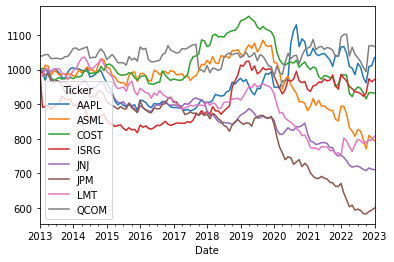

In [24]:
wealthe_index.plot.line()

<AxesSubplot:xlabel='Date'>

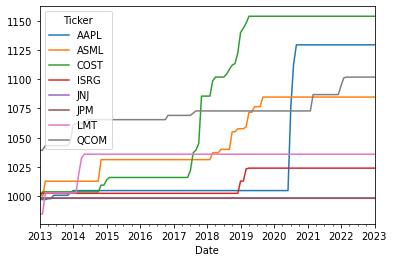

In [25]:
previous_peaks=wealthe_index.cummax()
previous_peaks.plot()

<AxesSubplot:xlabel='Date'>

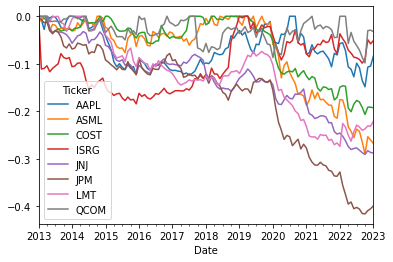

In [26]:
drawdown=(wealthe_index-previous_peaks)/previous_peaks
drawdown.plot()

In [27]:
def drawdown(return_series: pd.Series):
    wealth_index=1000*(return_series+1).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdown=(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdown
    })

In [28]:
drawdown(df_monthly_return['AAPL']).head()

,Wealth,Peaks,Drawdown
Date,,,
2013-01,997.066592,997.066592,0.000000
2013-02,989.956981,997.066592,-0.007131
2013-03,969.329214,997.066592,-0.027819
2013-04,997.860055,997.860055,0.000000
2013-05,993.772138,997.860055,-0.004097


<AxesSubplot:xlabel='Date'>

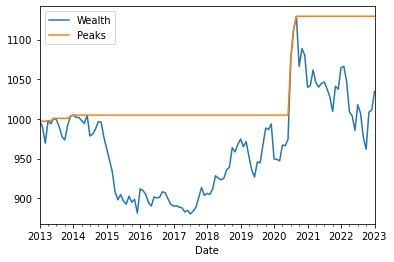

In [29]:
drawdown(df_monthly_return['AAPL'])[['Wealth','Peaks']].plot()

In [30]:
drawdown(df_monthly_return['AAPL'])['Drawdown'].min()

-0.14845974570059947

In [31]:
drawdown(df_monthly_return['AAPL'])['Drawdown'].idxmin()

Period('2022-10', 'M')

#Deviation from normality

In [37]:
pd.concat([df_monthly_return.mean(),df_monthly_return.median(), df_monthly_return.mean()>df_monthly_return.median()],axis='columns')

,0,1,2
Ticker,,,
AAPL,0.000453,-0.001514,True
ASML,-0.001751,-0.002244,True
COST,-0.000505,0.000000,False
ISRG,-0.000078,0.000304,False
JNJ,-0.002767,-0.002252,False
JPM,-0.004118,-0.003917,False
LMT,-0.001679,-0.002594,True
QCOM,0.000687,0.000775,False


#skewness 
$$ S(R)=\frac{E[(R-E(R))^3]}{\sigma_R^3} $$

In [38]:
def skewness(r):
    demeaned_r=r-r.mean()
    #use the population standard deviation, so set dof=0
    sigma_r=r.std(ddof=0)#volatility
    exp=(demeaned_r**3).mean()#expected value of demean
    return exp/sigma_r**3

In [39]:
skewness(df_monthly_return)

Ticker
AAPL    1.285503
ASML    0.130754
COST   -0.291509
ISRG   -1.407117
JNJ    -0.691055
JPM    -0.193965
LMT     0.993991
QCOM    0.251946
dtype: float64

In [40]:
import scipy.stats
scipy.stats.skew(df_monthly_return)

array([ 1.2855034 ,  0.13075358, -0.29150872, -1.40711652, -0.69105469,
       -0.19396499,  0.99399092,  0.25194556])

In [41]:
df_monthly_return.shape

(121, 8)

In [42]:
#mean is zero and std is 15%
normal_returns=np.random.normal(0, 0.15,size=61000)

In [43]:
skewness(normal_returns)

-0.007149675648798383

#Kutosis
$$ K(R)=\frac{E[(R-E(R))^4]}{\sigma_R^4} $$

In [44]:
def kurtosis(r):
    demeaned_r=r-r.mean()
    #use the population standard deviation, so set dof=0
    sigma_r=r.std(ddof=0)#volatility
    exp=(demeaned_r**4).mean()#expected value of demean
    return exp/sigma_r**4

In [45]:
kurtosis(df_monthly_return)

Ticker
AAPL    10.539682
ASML     3.849939
COST     6.448022
ISRG    14.939556
JNJ      4.101600
JPM      3.680761
LMT      7.215933
QCOM     7.299751
dtype: float64

In [46]:
scipy.stats.kurtosis(normal_returns, fisher=True)

-0.013589078855384074

In [47]:
scipy.stats.kurtosis(df_monthly_return, fisher=False)

array([10.53968192,  3.84993893,  6.44802179, 14.93955615,  4.10160029,
        3.68076087,  7.21593304,  7.29975147])

In [48]:
scipy.stats.jarque_bera(normal_returns)

Jarque_beraResult(statistic=0.9890502171610693, pvalue=0.6098604560364045)

In [49]:
scipy.stats.jarque_bera(df_monthly_return)

Jarque_beraResult(statistic=1797.785365248062, pvalue=0.0)

In [50]:
def is_normal(r, level=0.01):
    import scipy.stats
    #apply at least 1% of condident level by default
    statistic, p_value=scipy.stats.jarque_bera(r)
    return p_value>level

In [51]:
is_normal(normal_returns)

True

In [52]:
#apply function to each column when axis=0
df_monthly_return.agg(is_normal, axis=0)

Ticker
AAPL    False
ASML     True
COST    False
ISRG    False
JNJ     False
JPM      True
LMT     False
QCOM    False
dtype: bool

Downsize

In [53]:
from matplotlib import pyplot as plt

In [54]:
df_monthly_return[df_monthly_return<0].std(ddof=0)

Ticker
AAPL    0.010953
ASML    0.011258
COST    0.009681
ISRG    0.015226
JNJ     0.007691
JPM     0.009882
LMT     0.007394
QCOM    0.012782
dtype: float64

In [55]:
def semideviation(r):
    is_negative=r<0
    return(r[is_negative].std(ddof=0))

In [56]:
semideviation(df_monthly_return)

Ticker
AAPL    0.010953
ASML    0.011258
COST    0.009681
ISRG    0.015226
JNJ     0.007691
JPM     0.009882
LMT     0.007394
QCOM    0.012782
dtype: float64

### VaR and CVaR
- historic var
- parametric var (Gaussian)
- modified cornish-fish var (returns are not Gaussian, more fatter tail)

In [57]:
#5% chance for apple to lose 3.6% or less
np.percentile(df_monthly_return, 5, axis=0)

array([-0.02598064, -0.02813659, -0.02011077, -0.0228162 , -0.02160299,
       -0.02652468, -0.02145437, -0.02435943])

In [58]:
def var_historic(r, level=5):
    if isinstance(r, pd.DataFrame): #if r is dataframe, return trune
        return r.agg(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r,level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [59]:
var_historic(df_monthly_return, 5)

Ticker
AAPL    0.025981
ASML    0.028137
COST    0.020111
ISRG    0.022816
JNJ     0.021603
JPM     0.026525
LMT     0.021454
QCOM    0.024359
dtype: float64

In [60]:
from scipy.stats import norm
#for normal distribution, what's the z score for half of the distribution lie below that 
norm.ppf(0.5)

0.0

In [61]:
z=norm.ppf(0.05)

In [62]:
-(df_monthly_return.mean()+
  z*df_monthly_return.std(ddof=0))

Ticker
AAPL    0.030168
ASML    0.030258
COST    0.021389
ISRG    0.029403
JNJ     0.018961
JPM     0.026567
LMT     0.023803
QCOM    0.028379
dtype: float64

In [63]:
def var_gaussian(r, level=5):
    #computre z score assuming it's Gaussian
    z=norm.ppf(level/100)
    return -(r.mean()+z*r.std(ddof=0))

In [64]:
var_gaussian(df_monthly_return)

Ticker
AAPL    0.030168
ASML    0.030258
COST    0.021389
ISRG    0.029403
JNJ     0.018961
JPM     0.026567
LMT     0.023803
QCOM    0.028379
dtype: float64

In [65]:
def var_gaussian(r, level=5, modified=False):
    #computre z score assuming it's Gaussian
    z=norm.ppf(level/100)
    if modified:
        s=skewness(r)
        k=kurtosis(r)
        z=(z+
             (z**2-1)*s/6+
             (z**3-3*z)*(k-3)/24-
             (2*z**3-5*z)*(s**2)/36
            )
    return -(r.mean()+z*r.std(ddof=0))

In [66]:
var_list=[var_gaussian(df_monthly_return), var_gaussian(df_monthly_return, modified=True),
         var_historic(df_monthly_return)]

<AxesSubplot:title={'center':'Portfolio VaR'}, xlabel='Ticker'>

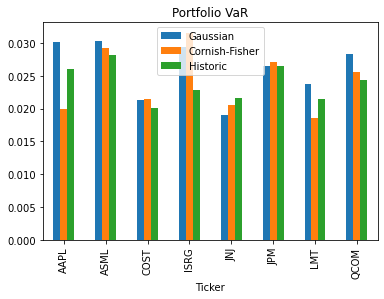

In [67]:
comparison=pd.concat(var_list, axis=1)
comparison.columns=["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title="Portfolio VaR")

###Beyond VaR, CVaR

In [68]:
#find all the returns that are less than historical var
def cva_historic(r, level=5):
    if isinstance(r, pd.Series): #if r is dataframe, return trune
        is_beyond=r<=-var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.agg(cva_historic, level=level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [69]:
cva_historic(df_monthly_return, 5)
#if the 5% chance happens, average loss is 4.4% for apple for a month

Ticker
AAPL    0.036790
ASML    0.037505
COST    0.029869
ISRG    0.038468
JNJ     0.027512
JPM     0.034075
LMT     0.026325
QCOM    0.037889
dtype: float64

In [70]:
def semideviation3(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    excess= r-r.mean()                                        # We demean the returns
    excess_negative = excess[excess<0]                        # We take only the returns below the mean
    excess_negative_square = excess_negative**2               # We square the demeaned returns below the mean
    n_negative = (excess<0).sum()                             # number of returns under the mean
    return (excess_negative_square.sum()/n_negative)**0.5     # semideviation


In [71]:
def annualized_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

In [72]:
def annualized_return(r, periods_per_year):
    compounded_growth=(1+r).prod()
    n_periods=r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [73]:
returns=annualized_return(df_monthly_return,12)
returns

Ticker
AAPL    0.003390
ASML   -0.022578
COST   -0.007006
ISRG   -0.002877
JNJ    -0.033273
JPM    -0.049382
LMT    -0.021024
QCOM    0.006399
dtype: float64

In [74]:
vol=annualized_vol(df_monthly_return, 12)
vol

Ticker
AAPL    0.064756
ASML    0.060285
COST    0.044165
ISRG    0.062016
JNJ     0.034246
JPM     0.047476
LMT     0.046787
QCOM    0.061469
dtype: float64

In [75]:
rf_per_period=(1+0.03)**(1/12)-1
excess_return=df_monthly_return-rf_per_period
annual_excess_return=annualized_return(excess_return, 12)
annual_vol=annualized_vol(df_monthly_return, 12)
sp=annual_excess_return/annual_vol
sp

Ticker
AAPL   -0.400003
ASML   -0.848855
COST   -0.815522
ISRG   -0.516030
JNJ    -1.798137
JPM    -1.627268
LMT    -1.061407
QCOM   -0.373744
dtype: float64

In [76]:
def sharp_ratio(r, riskfree_rate, periods_per_year):
    rf_per_period=(1+riskfree_rate)**(1/periods_per_year)-1
    excess_return=r-rf_per_period
    annual_excess_return=annualized_return(excess_return, periods_per_year)
    annual_vol=annualized_vol(r, periods_per_year)
    return annual_excess_return/annual_vol

In [77]:
sp=sharp_ratio(df_monthly_return, 0.03, 12)
sp

Ticker
AAPL   -0.400003
ASML   -0.848855
COST   -0.815522
ISRG   -0.516030
JNJ    -1.798137
JPM    -1.627268
LMT    -1.061407
QCOM   -0.373744
dtype: float64

# Efficient Frontier

In [78]:
cov=df_monthly_return.cov()
cov.shape

(8, 8)

In [79]:
cov#The Covariance Matrix is a symmetric matrix with variances along the diagonal and the product of the pairwise correlation and the individual volatililites (i.e. the covariance) on the off-diagonal entries

Ticker,AAPL,ASML,COST,ISRG,JNJ,JPM,LMT,QCOM
Ticker,,,,,,,,
AAPL,0.000349,0.000106,0.000074,0.000108,0.000041,0.000066,0.000042,0.000101
ASML,0.000106,0.000303,0.000099,0.000160,0.000073,0.000105,0.000076,0.000168
COST,0.000074,0.000099,0.000163,0.000075,0.000068,0.000061,0.000060,0.000071
ISRG,0.000108,0.000160,0.000075,0.000320,0.000078,0.000105,0.000050,0.000115
JNJ,0.000041,0.000073,0.000068,0.000078,0.000098,0.000064,0.000056,0.000051
JPM,0.000066,0.000105,0.000061,0.000105,0.000064,0.000188,0.000058,0.000073
LMT,0.000042,0.000076,0.000060,0.000050,0.000056,0.000058,0.000182,0.000038
QCOM,0.000101,0.000168,0.000071,0.000115,0.000051,0.000073,0.000038,0.000315


In [80]:
def portfolio_return(weights, returns):
    return weights.T @ returns

In [81]:
def portfolio_vol(weights, covmatrix):
    return (weights.T @ covmatrix @ weights)**0.5

In [82]:
weights=np.repeat(1/8,8)
weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [83]:
portfolio_return(weights, returns)

-0.01579391793118501

In [84]:
portfolio_vol(weights, cov)

0.010001168689498966

##2 Assets Frontier

In [85]:
l=['AAPL','COST']
n_points=20
weights=[np.array([w, 1-w]) for w in 
        np.linspace(0,1,n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [86]:
len(weights)

20

In [87]:
return_2assets=[portfolio_return(w, returns[l]) for w in weights]

In [88]:
return_2assets

[-0.0070060477451503456,
 -0.0064588712490805,
 -0.005911694753010654,
 -0.005364518256940807,
 -0.004817341760870961,
 -0.004270165264801115,
 -0.0037229887687312696,
 -0.0031758122726614226,
 -0.002628635776591577,
 -0.0020814592805217316,
 -0.0015342827844518846,
 -0.000987106288382038,
 -0.00043992979231219234,
 0.00010724670375765293,
 0.0006544231998274997,
 0.001201599695897346,
 0.0017487761919671916,
 0.002295952688037037,
 0.002843129184106884,
 0.0033903056801767306]

In [89]:
vol_2assets=[portfolio_vol(w, cov.loc[l,l]) for w in weights]

In [90]:
vol_2assets

[0.012749380439824534,
 0.012417483035384718,
 0.012159856658942198,
 0.011981293281413383,
 0.011885356920249758,
 0.011874050498691804,
 0.01194761428346698,
 0.012104501005196049,
 0.012341533446065242,
 0.01265420865614159,
 0.013037085231111183,
 0.013484184500021229,
 0.013989350150569364,
 0.014546533928641702,
 0.015149997582055262,
 0.015794437306618527,
 0.016475045330025435,
 0.01718752550884942,
 0.017928078349493372,
 0.0186933677862247]

<AxesSubplot:xlabel='Vol', ylabel='R'>

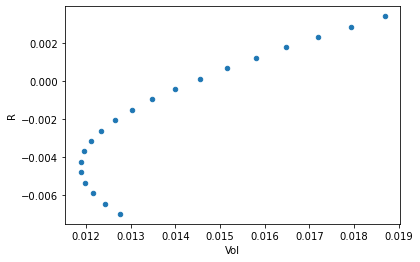

In [91]:
my_dict={"R":return_2assets, "Vol": vol_2assets}
ef_2assets=pd.DataFrame(my_dict)
ef_2assets.plot.scatter(x="Vol",y="R")

In [92]:
def plot_ef2(n_points, r, cov):
    if r.shape[0]!=2:
        raise ValueError("plot_ef2 can only plot two asset frontiers")
    weights=[np.array([w,1-w]) for w in np.linspace(0,1,n_points)]
    rets=[portfolio_return(w,r) for w in weights]
    vols=[portfolio_vol(w, cov) for w in weights]
    ef=pd.DataFrame(
    {
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility",y="Returns", style=".-")

<AxesSubplot:xlabel='Volatility'>

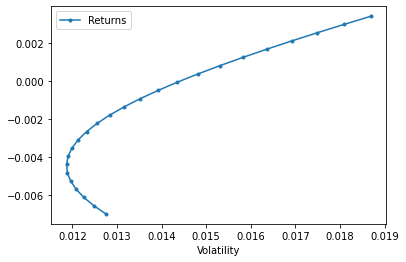

In [93]:
plot_ef2(25, returns[l], cov.loc[l,l])

In [94]:
from scipy.optimize import minimize

In [95]:
def minimize_vol(target_return, r, cov):
    n=r.shape[0] # get the number of assets
    init_guess=np.repeat(1/n, n)
    bounds=((0.0, 1),)*n #tuple of tuple and make it n copies of it
    return_is_target={
        'type':'eq',
        'args':(r,),
        'fun': lambda weights, r: target_return-portfolio_return(weights, r)
    }
    weights_sum_to_1={
        'type':'eq',
        'fun':lambda weights: np.sum(weights)-1
    }
    results=minimize(portfolio_vol, init_guess,
                    args=(cov,), method='SLSQP',
                     options={'disp': False},
                     constraints=(return_is_target, weights_sum_to_1),
                     bounds=bounds
                    )
    return results.x

In [96]:
((0.0, 1),)*3

((0.0, 1), (0.0, 1), (0.0, 1))

In [97]:
w15=minimize_vol(0.015, returns[l], cov.loc[l,l])
vol15=portfolio_vol(w15, cov.loc[l,l])
vol15

0.0186933677862247

In [98]:
w15

array([1., 0.])

In [99]:
def optimal_weights(n_points, r, cov):
    target_returns=np.linspace(r.min(), r.max(), n_points)
    weights=[minimize_vol(target_return, r, cov) for target_return in target_returns]
    return weights

In [100]:
def plot_ef(n_points, r, cov):
    weights=optimal_weights(n_points, r, cov)
    rets=[portfolio_return(w,r) for w in weights]
    vols=[portfolio_vol(w, cov) for w in weights]
    ef=pd.DataFrame(
    {
        "Returns": rets,
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility",y="Returns", style=".-")

<AxesSubplot:xlabel='Volatility'>

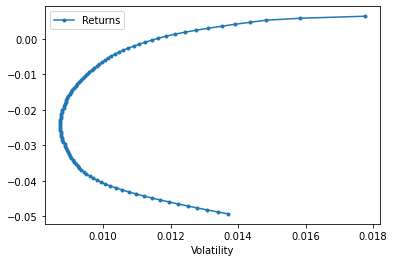

In [101]:
plot_ef(100,returns,cov)

# Max Sharp Ratio

In [102]:
def max_sharp_ratio(riskfree_rate, r, cov):
    n=r.shape[0] # get the number of assets
    init_guess=np.repeat(1/n, n)
    bounds=((0.0, 1),)*n #tuple of tuple and make it n copies of it
    weights_sum_to_1={
        'type':'eq',
        'fun':lambda weights: np.sum(weights)-1
    }
    
    def negative_sharp_ratio(weights, riskfree_rate, r, cov):
        rtns=portfolio_return(weights, r)
        vol=portfolio_vol(weights, cov)
        return -(rtns-riskfree_rate)/vol
    
    results=minimize(negative_sharp_ratio, init_guess,
                    args=(riskfree_rate, r, cov,), method='SLSQP',
                     options={'disp': False},
                     constraints=(weights_sum_to_1),
                     bounds=bounds
                    )
    return results.x

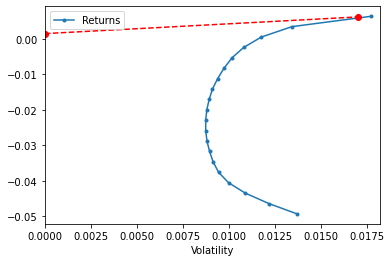

In [103]:
ax=plot_ef(20,returns,cov)
ax.set_xlim(left=0)
rf=0.0015
w_msr=max_sharp_ratio(rf, returns, cov)
r_msr=portfolio_return(w_msr, returns)
vol_msr=portfolio_vol(w_msr, cov)
#add capital market line
cml_x=[0, vol_msr]
cml_y=[rf, r_msr]
ax.plot(cml_x, cml_y, color='red', marker='o', linestyle='dashed')

In [104]:
def plot_ef_cml(n_points, r, cov, show_cml=False, style='.-', riskfree_rate=0):
    weights=optimal_weights(n_points, r, cov)
    rets=[portfolio_return(w,r) for w in weights]
    vols=[portfolio_vol(w, cov) for w in weights]
    ef=pd.DataFrame(
    {
        "Returns": rets,
        "Volatility": vols
    })
    ax=ef.plot.line(x="Volatility",y="Returns", style=".-")
    if show_cml:
        ax.set_xlim(left=0)
        w_msr=max_sharp_ratio(riskfree_rate, returns, cov)
        r_msr=portfolio_return(w_msr, returns)
        vol_msr=portfolio_vol(w_msr, cov)
        #add capital market line
        cml_x=[0, vol_msr]
        cml_y=[riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='red', marker='o', linestyle='dashed', markersize=12, linewidth=2)
    return ax

<AxesSubplot:xlabel='Volatility'>

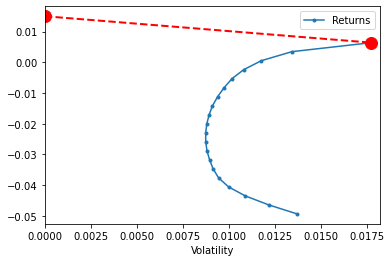

In [105]:
plot_ef_cml(20, returns, cov, show_cml=True, riskfree_rate=0.015)

### Global minimum variance portfolio

In [106]:
def gmv(cov):
    """
    return the weights of GMV portfolio given covariance matrix
    """
    n=cov.shape[0]
    return max_sharp_ratio(0,np.repeat(1,n),cov)
def plot_ef_cml_ew_gmv(n_points, r, cov, show_cml=False, style='.-', riskfree_rate=0, show_ew=False, show_gmv=False):
    weights=optimal_weights(n_points, r, cov)
    rets=[portfolio_return(w,r) for w in weights]
    vols=[portfolio_vol(w, cov) for w in weights]
    ef=pd.DataFrame(
    {
        "Returns": rets,
        "Volatility": vols
    })
    ax=ef.plot.line(x="Volatility",y="Returns", style=".-")
    if show_ew:
        n=r.shape[0]
        w_ew=np.repeat(1/n,n)
        r_ew=portfolio_return(w_ew, r)
        vol_ew=portfolio_vol(w_ew, cov)
        #display EW
        ax.plot([vol_ew],[r_ew], color='goldenrod', marker='x',markersize=10)
    if show_gmv:
        w_gmv=gmv(cov)
        r_gmv=portfolio_return(w_gmv, r)
        vol_gmv=portfolio_vol(w_gmv, cov)
        #display GMV
        ax.plot([vol_gmv],[r_gmv], color='midnightblue', marker='x',markersize=10)
    if show_cml:
        ax.set_xlim(left=0)
        w_msr=max_sharp_ratio(riskfree_rate, returns, cov)
        r_msr=portfolio_return(w_msr, returns)
        vol_msr=portfolio_vol(w_msr, cov)
        #add capital market line
        cml_x=[0, vol_msr]
        cml_y=[riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='red', marker='o', linestyle='dashed', markersize=12, linewidth=2)
    return ax

<AxesSubplot:xlabel='Volatility'>

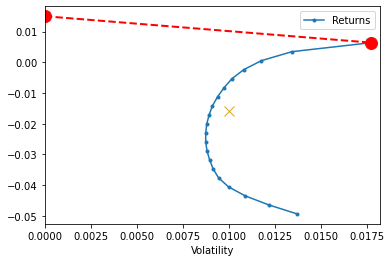

In [107]:
plot_ef_cml_ew_gmv(20, returns, cov, show_cml=True, riskfree_rate=0.015, show_ew=True)

<AxesSubplot:xlabel='Volatility'>

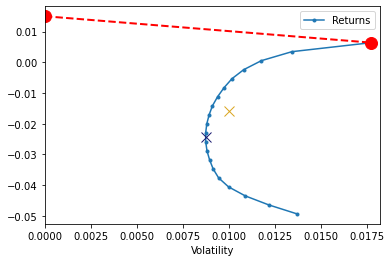

In [108]:
plot_ef_cml_ew_gmv(20, returns, cov, show_cml=True, riskfree_rate=0.015, show_ew=True, show_gmv=True)

### Rolling Correlation

In [109]:
aapl_tr36returns=df_return['AAPL'].rolling(window=36).agg(annualized_return, periods_per_year=12)

<AxesSubplot:xlabel='Date'>

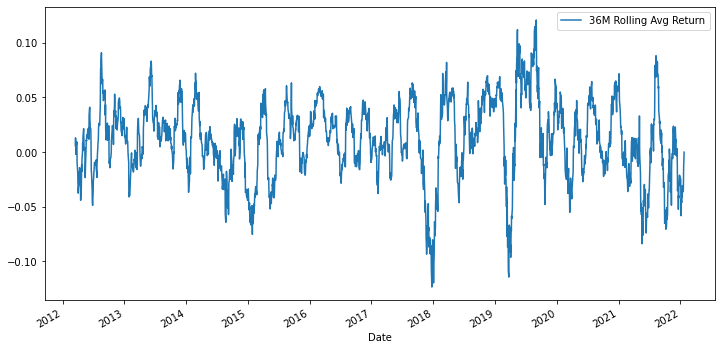

In [110]:
aapl_tr36returns.plot(figsize=(12,6), label='36M Rolling Avg Return', legend=True)

In [111]:
rolling_corr=df_return.rolling(window=36).corr()
rolling_corr.tail()

Ticker                            AAPL      ASML      COST      ISRG  \
Date                      Ticker                                       
2023-01-24 00:00:00-05:00 ISRG     NaN  0.500216  0.311069  1.000000   
                          JNJ      NaN  0.324080  0.289403  0.586123   
                          JPM      NaN  0.546006  0.612931  0.426632   
                          LMT      NaN -0.059556  0.071690  0.256036   
                          QCOM     NaN  0.821883  0.632826  0.480453   

Ticker                                 JNJ       JPM       LMT      QCOM  
Date                      Ticker                                          
2023-01-24 00:00:00-05:00 ISRG    0.586123  0.426632  0.256036  0.480453  
                          JNJ     1.000000  0.420231  0.363835  0.340978  
                          JPM     0.420231  1.000000  0.164123  0.463238  
                          LMT     0.363835  0.164123  1.000000  0.231359  
                          QCOM    0.340978  0.463238  0.231359  1.000000

In [112]:
rolling_corr.index.names

FrozenList(['Date', 'Ticker'])

<AxesSubplot:xlabel='Date'>

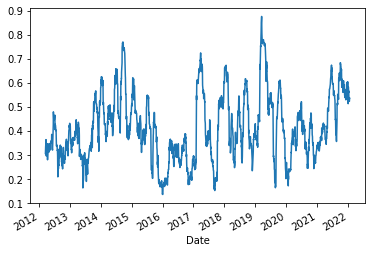

In [113]:
aapl_tr36corr=rolling_corr.groupby(level='Date').apply(
lambda corrmatrix: corrmatrix.values.mean())
aapl_tr36corr.plot()

<AxesSubplot:label='6510c5d8-6241-4661-9abc-47e331458a71'>

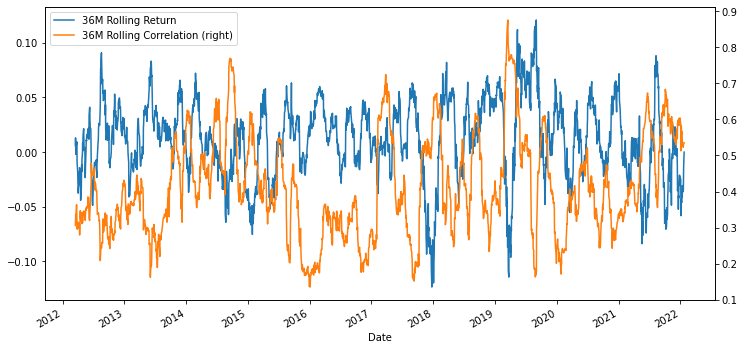

In [114]:
aapl_tr36returns.plot(label='36M Rolling Return', figsize=(12,6), legend=True)
aapl_tr36corr.plot(label='36M Rolling Correlation', legend=True, secondary_y=True)